In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Data analytics/Diwali Sales/Diwali Sales Data.csv', encoding='unicode_escape')

In [5]:
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [6]:
df.drop(['Status', 'unnamed1'], axis=1, inplace=True) 

In [7]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df['Amount'] = df['Amount'].astype('int')

# **Exploratory Data Analysis**

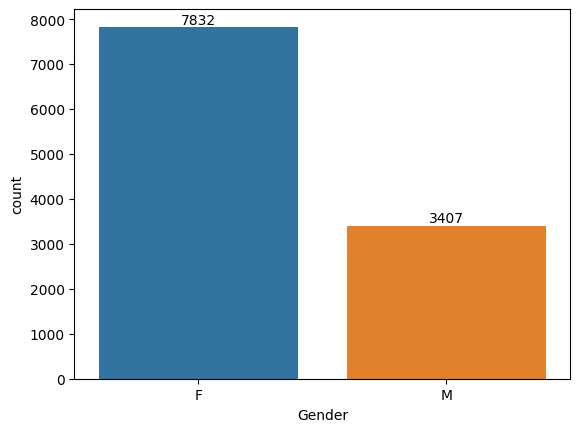

In [10]:
ax = sns.countplot(x='Gender', data=df)

for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

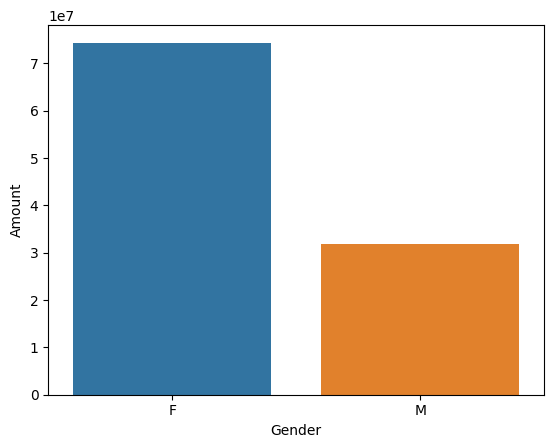

In [11]:
sales_gender = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x='Gender', y='Amount', data = sales_gender)

**From above graph we can see that most of the buyers are Females and purchasing values is also higher for women**

## **Age**

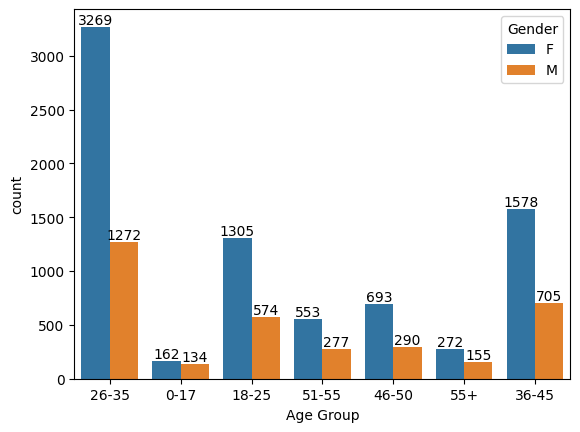

In [12]:
ax = sns.countplot(data=df, x='Age Group', hue='Gender')

for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

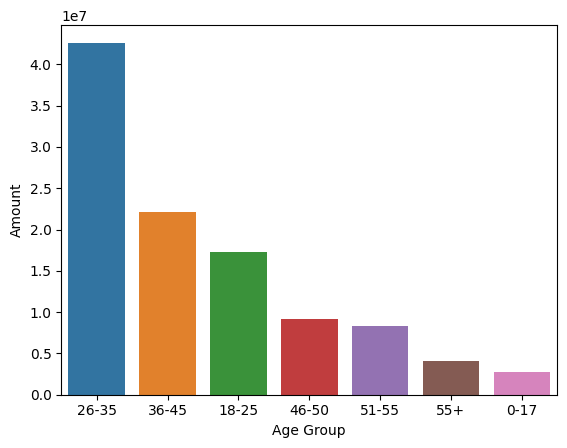

In [14]:
sales_gender = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x='Age Group', y='Amount', data = sales_gender)

**From above graph as we can see that most of the buyers are of age group 26-35 years old women**

## **State**

<Axes: xlabel='State', ylabel='Orders'>

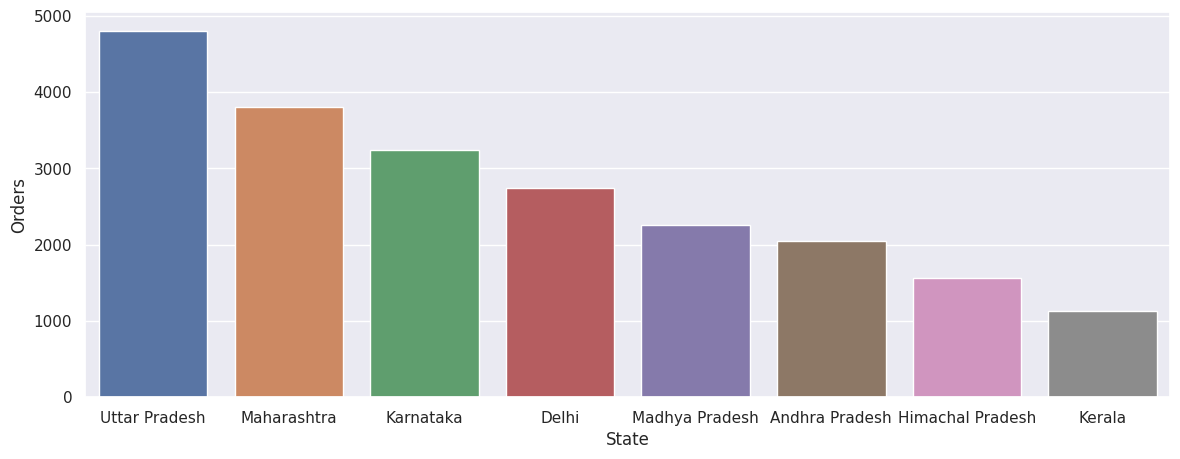

In [26]:
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(8)

sns.set(rc={'figure.figsize':(14, 5)})
sns.barplot(data=sales_state, x='State', y='Orders')

<Axes: xlabel='State', ylabel='Amount'>

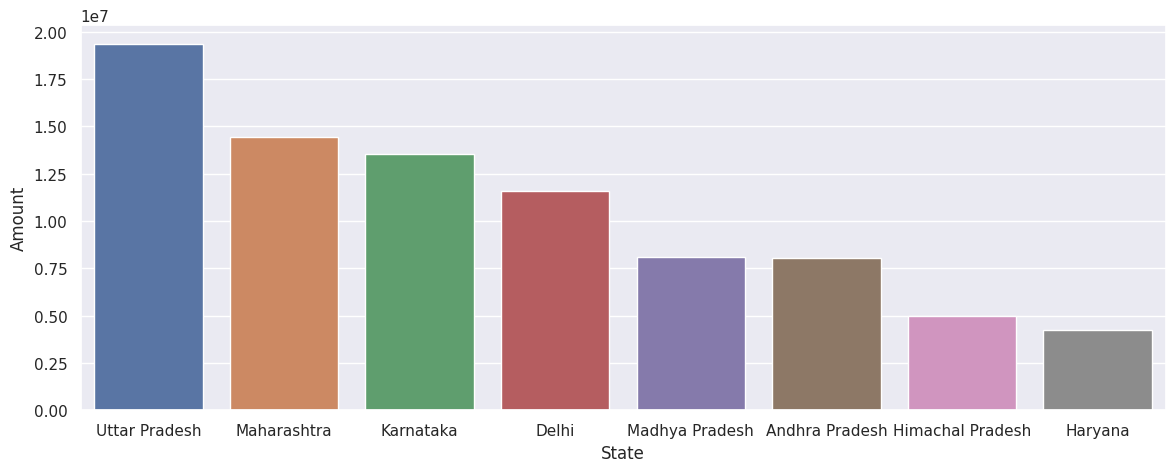

In [28]:
sales_gender = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(8)

sns.barplot(x='State', y='Amount', data = sales_gender)

**From above graphs we can see that most of the orders are from UP, Maharastra, Karnataka, Delhi**

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 1.2+ MB


<Axes: xlabel='Marital_Status', ylabel='Amount'>

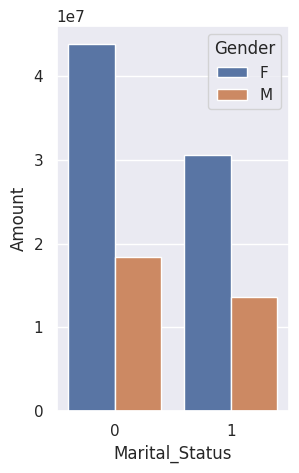

In [34]:
sales_gender = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(3 ,5)})
sns.barplot(x='Marital_Status', y='Amount', data = sales_gender, hue='Gender')

**As we can see from above graph most the buyers are married women.**

<Axes: xlabel='Occupation', ylabel='Amount'>

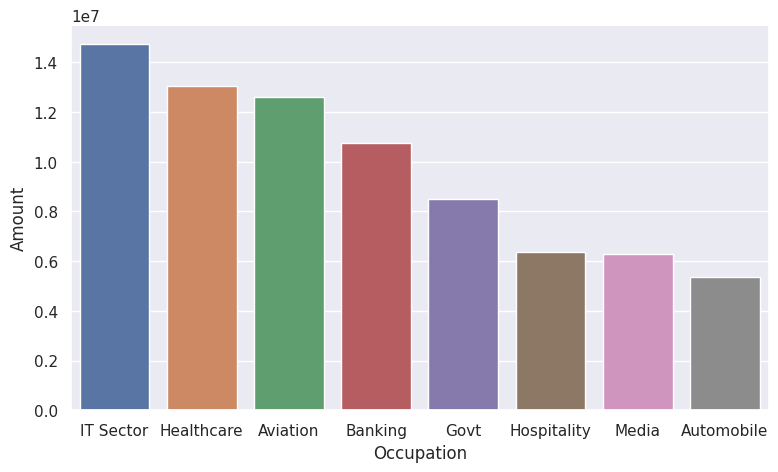

In [41]:
sales_occ = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(8)

sns.set(rc={'figure.figsize':(9,5)})
sns.barplot(data=sales_occ, x='Occupation', y='Amount')

**We can see from above graph that most of the buyers are working in IT, healthcare, Aviation, Banking sector**

## Product category


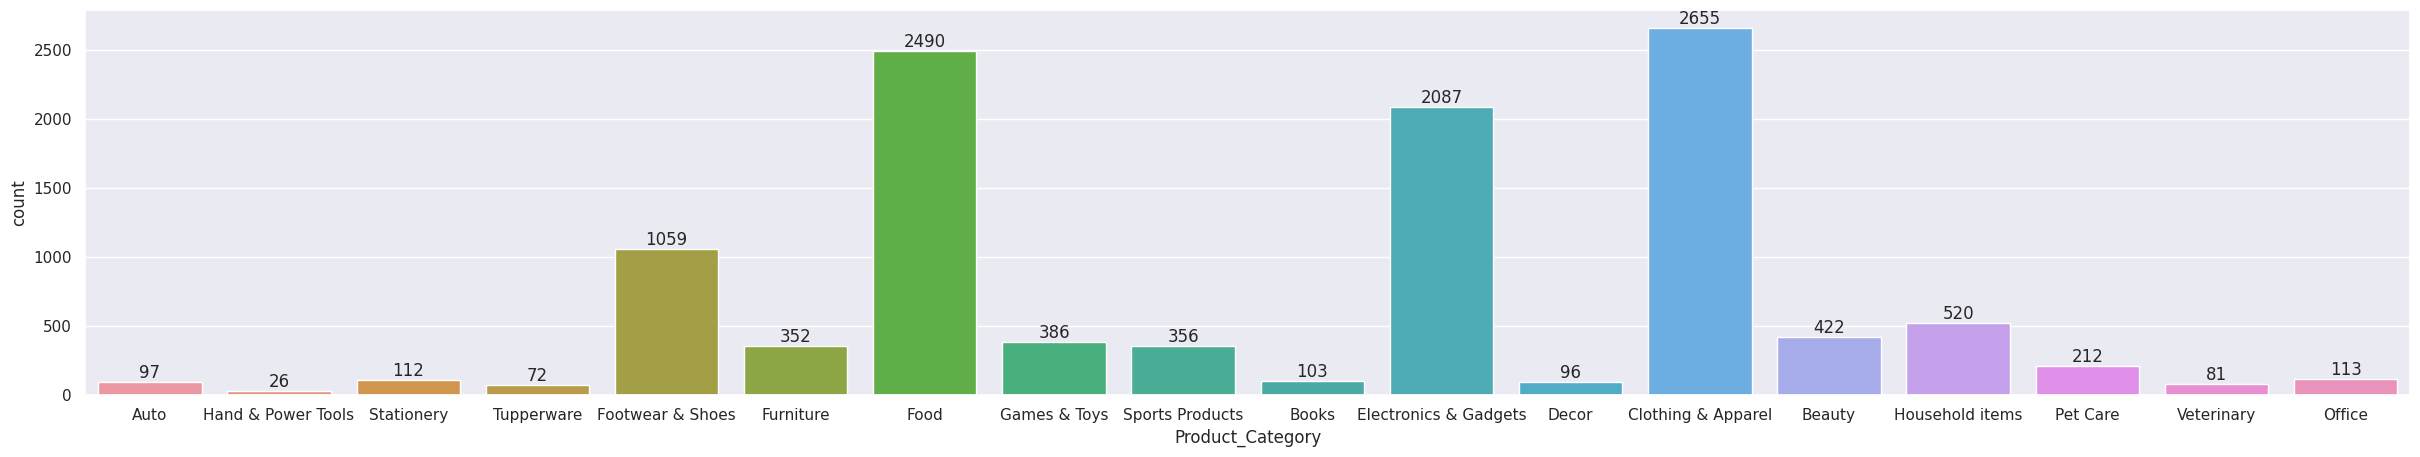

In [51]:
sns.set(rc={'figure.figsize':(30, 5)})
ax = sns.countplot(data=df, x='Product_Category')

for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

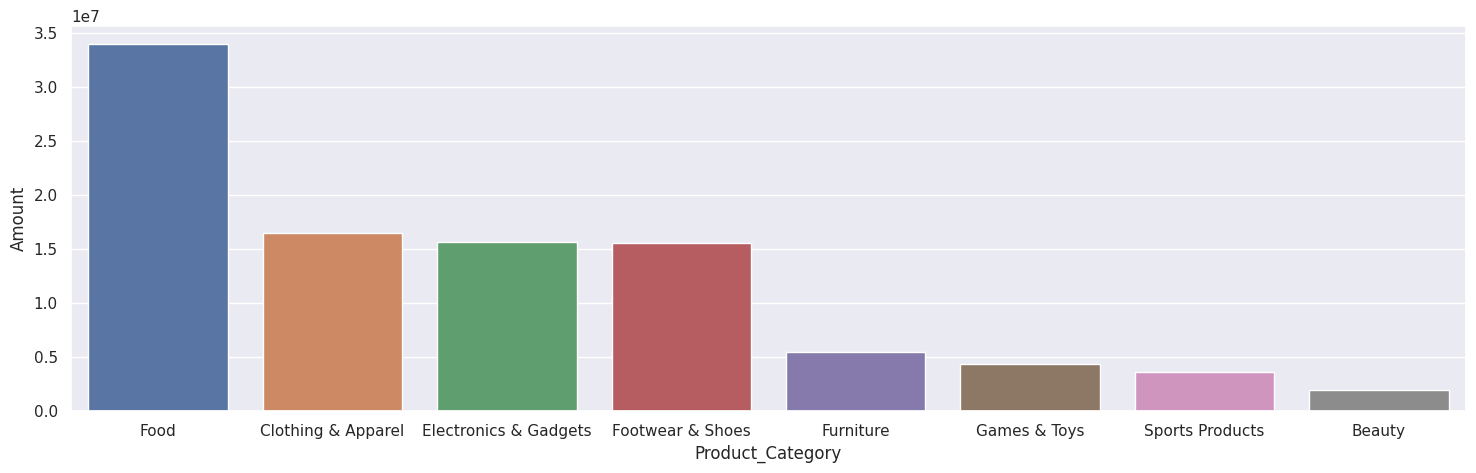

In [57]:
sales_product = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(8)

sns.set(rc={'figure.figsize':(18,5)})
sns.barplot(data=sales_product, x='Product_Category', y='Amount')

**From above graph we can see that most of the sold products are from food, clothing, electronics, footware category**

# **Conclusion**

---


>
>Married women between the ages of 26 to 35 residing in Uttar Pradesh, Maharashtra, Karnataka, and Delhi and working in IT, Healthcare, Aviation, and Banking industries have shown a higher likelihood to purchase products from categories such as Food, Clothing, Electronics, and Footwear.
>